# Big Data Analytics Prediction Model

## Objective: 
The overall objective of this project is to come up with an example of a classification model based on a sample large dataset, together with ETL and EDA operations.

### Table of Contents:
1. Loading the required libraries.
2. Loading the dataset.
3. Exploring the dataset.
4. Data Wrangling.
5. Exploratory Data Analysis
6. Building the Model.
7. Application

### Loading the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt

%matplotlib inline

### Loading the dataset

In [2]:
df = pd.read_csv("D:\Personal Projects 2\Practice Files July 2024\HR Analytics\HR_Analytics.csv")

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Alvin\AppData\Local\Temp\ipykernel_40988\2312147085.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv("D:\Personal Projects 2\Practice Files July 2024\HR Analytics\HR_Analytics.csv")


### Exploring the dataset

In [3]:
## first 4 rows

df.head()

EmpID  Age AgeGroup Attrition     BusinessTravel  DailyRate  \
0  RM297   18    18-25       Yes      Travel_Rarely        230   
1  RM302   18    18-25        No      Travel_Rarely        812   
2  RM458   18    18-25       Yes  Travel_Frequently       1306   
3  RM728   18    18-25        No         Non-Travel        287   
4  RM829   18    18-25       Yes         Non-Travel        247   

               Department  DistanceFromHome  Education EducationField  ...  \
0  Research & Development                 3          3  Life Sciences  ...   
1                   Sales                10          3        Medical  ...   
2                   Sales                 5          3      Marketing  ...   
3  Research & Development                 5          2  Life Sciences  ...   
4  Research & Development                 8          1        Medical  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         3             80                 0   
1                         1             80                 0   
2                         4             80                 0   
3                         4             80                 0   
4                         4             80                 0   

  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                 0                      2                3               0   
1                 0                      2                3               0   
2                 0                      3                3               0   
3                 0                      2                3               0   
4                 0                      0                3               0   

  YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                  0                        0                  0.0  
1                  0                        0                  0.0  
2                  0                        0                  0.0  
3                  0                        0                  0.0  
4                  0                        0                  0.0  

[5 rows x 38 columns]

In [4]:
## shape

df.shape

(1480, 38)

In [5]:
## describe

df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1480.000000  1480.000000       1480.000000  1480.000000         1480.0   
mean     36.917568   801.384459          9.220270     2.910811            1.0   
std       9.128559   403.126988          8.131201     1.023796            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   800.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1480.000000              1480.000000  1480.000000     1480.000000   
mean      1031.860811                 2.724324    65.845270        2.729730   
std        605.955046                 1.092579    20.328266        0.713007   
min          1.000000                 1.000000    30.000000        1.000000   
25%        493.750000                 2.000000    48.000000        2.000000   
50%       1027.500000                 3.000000    66.000000        3.000000   
75%       1568.250000                 4.000000    83.000000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1480.000000  ...               1480.000000         1480.0   
mean      2.064865  ...                  2.708784           80.0   
std       1.105574  ...                  1.081995            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1480.000000        1480.000000            1480.000000   
mean           0.791892          11.281757               2.797973   
std            0.850527           7.770870               1.288791   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1480.000000     1480.000000         1480.000000   
mean          2.760811        7.009459            4.228378   
std           0.707024        6.117945            3.616020   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1480.000000           1423.000000  
mean                  2.182432              4.118060  
std                   3.219357              3.555484  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [6]:
## more information on the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

### Data Wrangling.

In [7]:
## checking for any null values

df.isnull().sum()

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

In [8]:
## dealing with null values

df["YearsWithCurrManager"] = df["YearsWithCurrManager"].fillna(df["YearsWithCurrManager"].mean())

df["YearsWithCurrManager"].isnull().sum()

0

In [9]:
## checking for any duplicates

df.duplicated().sum()

7

In [10]:
## dropping the duplicates

df = df.drop_duplicates()

df.duplicated().sum()

0

In [11]:
## renaming columns 

df = df.rename(columns = {
    "EmpID" : "Employee ID",
    "AgeGroup" : "Age Group",
    "BusinessTravel" : "Business Travel",
    "DistanceFromHome" : "Distance From Home",
    "DailyRate" : "Daily Rate",
    "EducationField" : "Education Field",
    "EmployeeCount" : "Employee Count",
    "EmployeeNumber" : "Employee Number",
    "EnvironmentSatisfaction" : "Environment Satisfaction",
    "HourlyRate" : "Hourly Rate",
    "Job Involvement" : "Job Involvement",
    "JobLevel" : "Job Level",
    "JobRole" : "Job Role", 
    "JobSatisfaction" : "Job Satisfaction", 
    "MaritalStatus" : "Marital Status",
    "MonthlyIncome" : "Monthly Income",
    "NumCompaniesWorked" : "Previous Companies Worked",
    "OverTime" : "Overtime",
    "PercentSalaryHike" : "Percent Salary Hike",
    "PerformanceRating" : "Performance Rating",
    "RelationshipSatisfaction" : "Relationship Satisfaction",
    "StandardHours" : "Standard Hours",
    "StockOptionLevel" : "Stock Option Level",
    "TotalWorkingYears" : "Total Working Years",
    "TrainingTimesLastYear" : "Previous Year Trainings Attended",
    "WorkLifeBalance" : "Work Life Balance",
    "YearsAtCompany" : "Years At Company",
    "YearsInCurrentRole" : "Years In Current Role",
    "YearsSinceLastPromotion" : "Years Since Last Promotion",
    "YearsWithCurrManager" : "Years With Current Manager"
})

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1473 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Employee ID                       1473 non-null   object 
 1   Age                               1473 non-null   int64  
 2   Age Group                         1473 non-null   object 
 3   Attrition                         1473 non-null   object 
 4   Business Travel                   1473 non-null   object 
 5   Daily Rate                        1473 non-null   int64  
 6   Department                        1473 non-null   object 
 7   Distance From Home                1473 non-null   int64  
 8   Education                         1473 non-null   int64  
 9   Education Field                   1473 non-null   object 
 10  Employee Count                    1473 non-null   int64  
 11  Employee Number                   1473 non-null   int64  
 12  Environment

In [12]:
## N/B: Due to the small size of the dataset, outliers were not removed.

In [13]:
## renaming values in columns 

df["Business Travel"] = df["Business Travel"].replace({
    "Travel_Rarely" : "Travel Rarely",
    "Travel_Frequently": "Travel Frequently",
    "TravelRarely" : "Travel Rarely",
    "Non-Travel" : "Never Travel"
})

### Exploratory Data Analysis

#### 1) Some Key KPIs

In [14]:
## number of customers 

print("Total Number of Customers:", df["Employee ID"].count())

Total Number of Customers: 1473


In [15]:
## number of age groups 

age_groups = pd.DataFrame(df["Age Group"].unique())
age_groups = age_groups.rename(columns = { 0 : "Age Group"})
print("No of Age Groups:", age_groups["Age Group"].count())

No of Age Groups: 5


In [16]:
## Average Daily Rate

print("Average Daily Rate:", "{:.2f}".format(df["Daily Rate"].mean()))

Average Daily Rate: 802.66


In [17]:
## total distance from home 

print("Total Distance From Home:", df["Distance From Home"].sum())

Total Distance From Home: 13547


In [18]:
## education fields

education = pd.DataFrame(df["Education Field"].unique())
education = education.rename(columns = { 0 : "Education Field"})
print("Education:", education["Education Field"].count())

Education: 6


#### 2) Univariate Analysis of Some Key Variables

C:\Users\Alvin\AppData\Local\Temp\ipykernel_40988\2376396113.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Monthly Income"], color = "darkgrey")


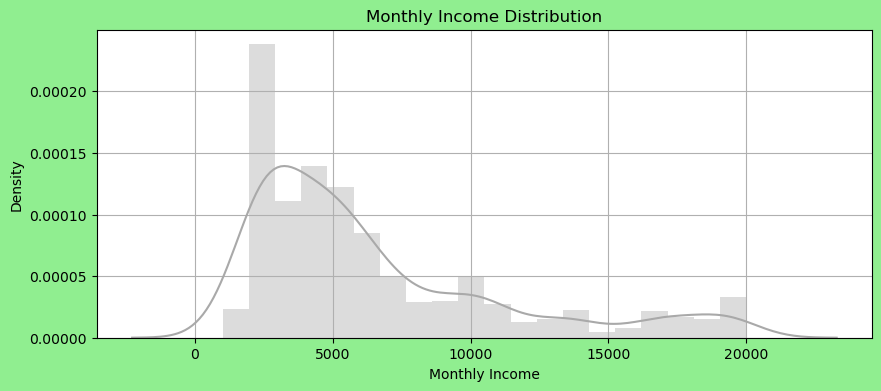

In [19]:
## distribution of monthly income

plt.figure(facecolor = "lightgreen", figsize=(10,4))
sns.distplot(df["Monthly Income"], color = "darkgrey")
plt.xlabel("Monthly Income")
plt.title("Monthly Income Distribution")
plt.grid(True)

##### Interpretation: The monthly income is skewed to the right.

C:\Users\Alvin\AppData\Local\Temp\ipykernel_40988\1608407316.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"], color = "maroon", hist=True, norm_hist=True)


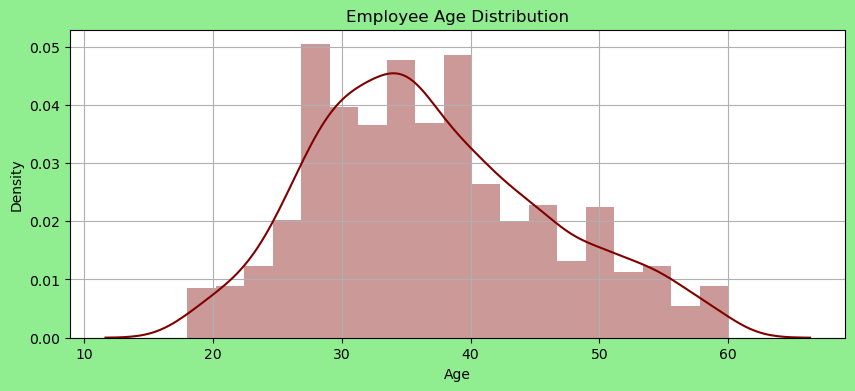

In [20]:
## distribution of employee age

plt.figure(facecolor = "lightgreen", figsize=(10,4))
sns.distplot(df["Age"], color = "maroon", hist=True, norm_hist=True)
plt.xlabel("Age")
plt.title("Employee Age Distribution")
plt.grid(True)

##### Interpretation: The Employee Age has a normal distribution.

#### 3) Some Bivariate Analysis 

Text(0.5, 1.0, 'Monthly Income Distribution Per Age Group & Gender')

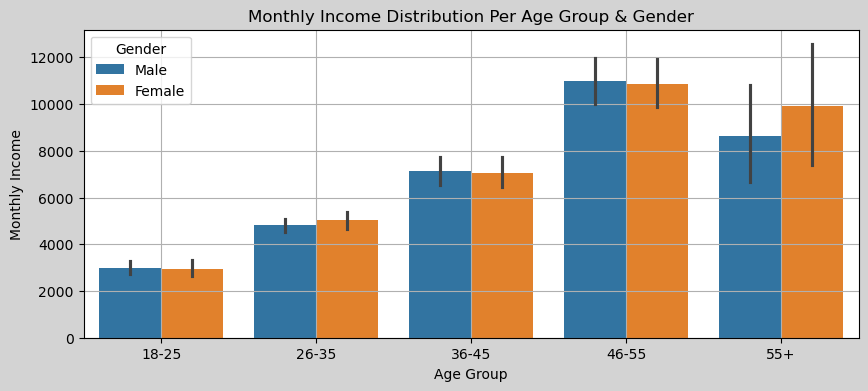

In [21]:
## Monthly Income Distribution Per Age Group & Gender

plt.figure(facecolor = "lightgrey", figsize=(10,4))
sns.barplot(df, x="Age Group", y = "Monthly Income", hue= "Gender")
plt.grid(True)
plt.title("Monthly Income Distribution Per Age Group & Gender")

##### Interpretation: Male Employees between 46-55  years earn the most.

Text(0.5, 1.0, 'Business Travel frequency per Employee Age and Gender')

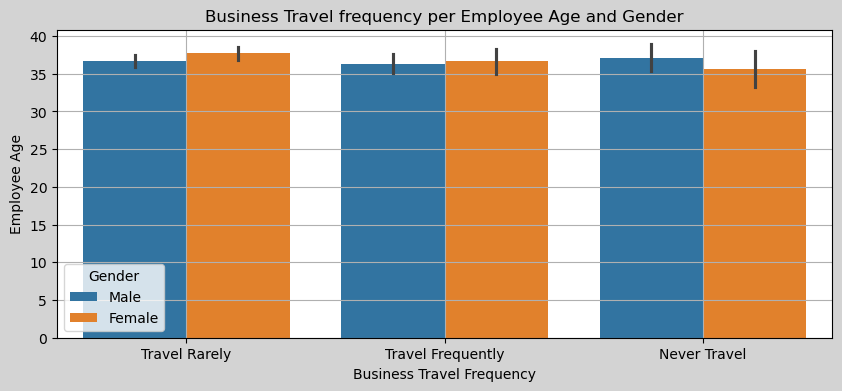

In [22]:
## Business Travel frequency per Employee Age and Gender

plt.figure(facecolor = "lightgrey", figsize=(10,4))
sns.barplot(df, x="Business Travel", y = "Age", hue= "Gender")
plt.grid(True)
plt.xlabel("Business Travel Frequency")
plt.ylabel("Employee Age")
plt.title("Business Travel frequency per Employee Age and Gender")

##### Interpretation: Female Employees travel more than male employees.

#### 4) Multivariate analysis

<Figure size 640x480 with 0 Axes>

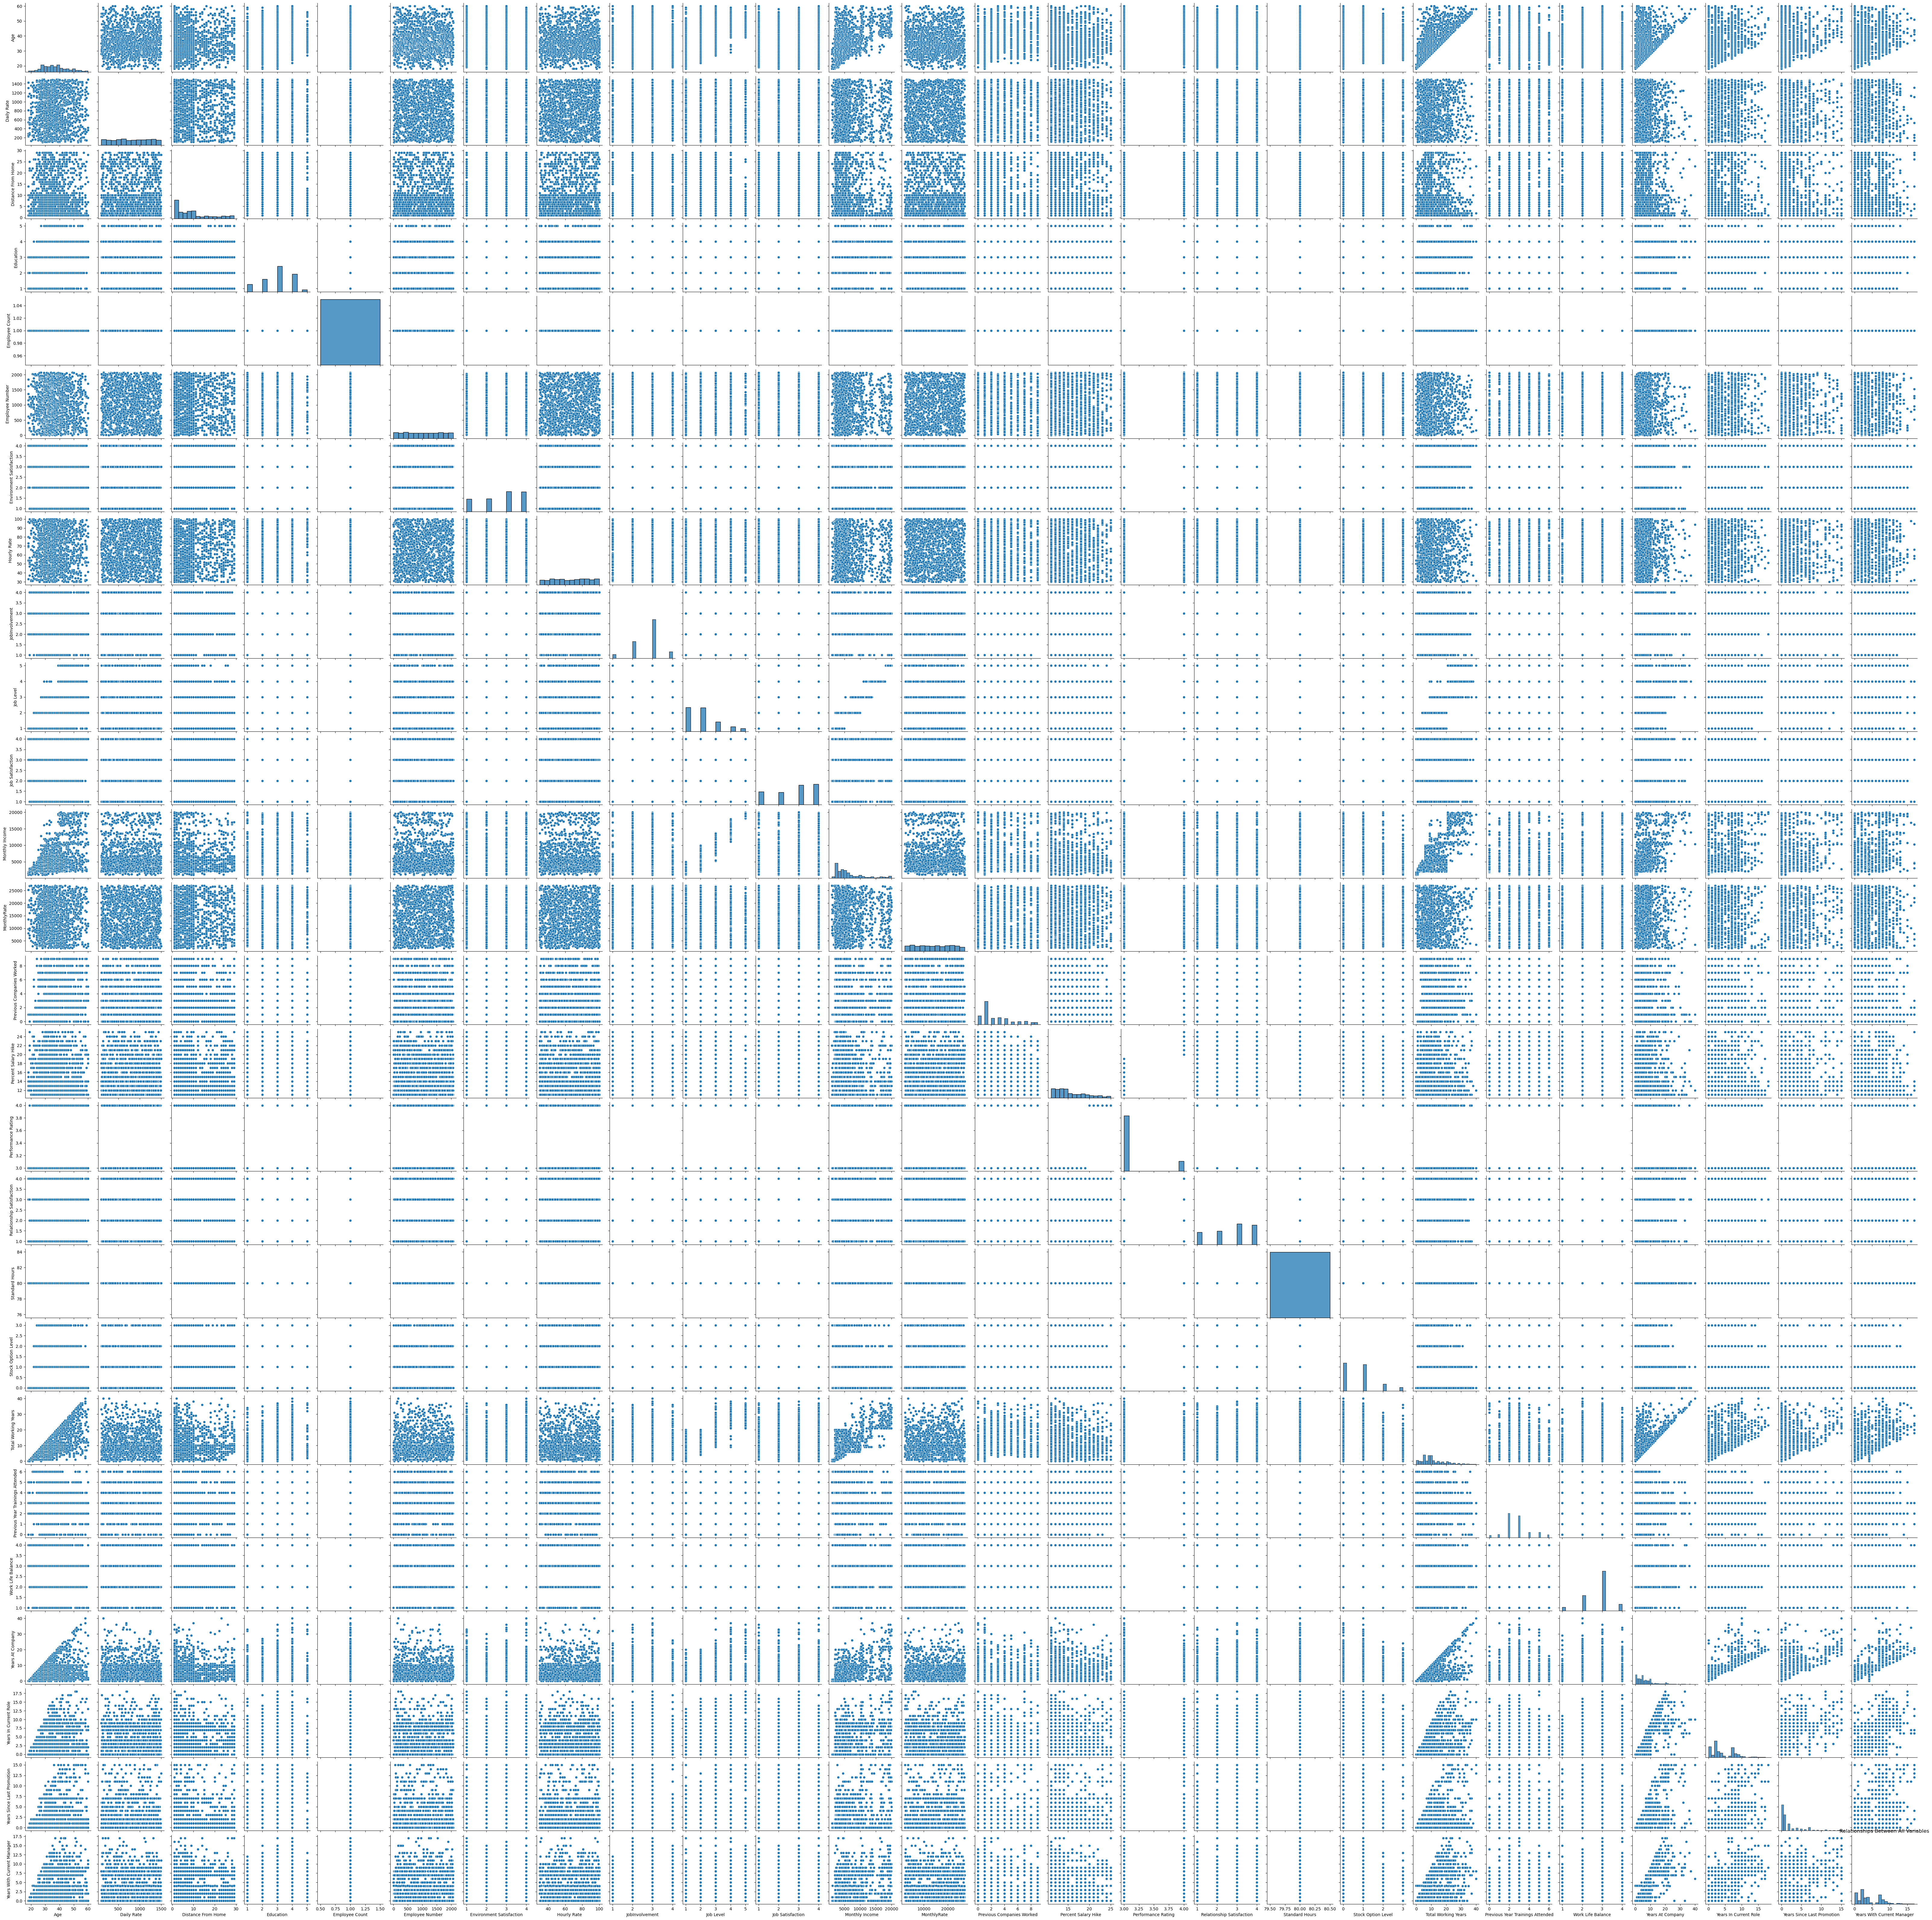

In [23]:
plt.figure(facecolor = "lightgrey")
sns.pairplot(df)
plt.title("Relationships Between All Variables")
plt.grid(True)

### Building the Classification Model

In [24]:
## preparing the dataset for modelling

df1 = df.drop(columns = ["Over18", "SalarySlab", "Employee ID"])
             
from sklearn.preprocessing import LabelEncoder

df1["Age Group"] = LabelEncoder().fit_transform(df1["Age Group"])
df1["Business Travel"] = LabelEncoder().fit_transform(df1["Business Travel"])
df1["Department"] = LabelEncoder().fit_transform(df1["Department"])
df1["Education Field"] = LabelEncoder().fit_transform(df1["Education Field"])
df1["Gender"] = LabelEncoder().fit_transform(df1["Gender"])
df1["Job Role"] = LabelEncoder().fit_transform(df1["Job Role"])
df1["Marital Status"] = LabelEncoder().fit_transform(df1["Marital Status"])
df1["Overtime"] = LabelEncoder().fit_transform(df1["Overtime"])
df1["Attrition"] = LabelEncoder().fit_transform(df1["Attrition"])

In [26]:
## scaling the data 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

data = sc.fit_transform(df1)

In [27]:
## loading the clustering model 

from sklearn.cluster import KMeans

sse = [] #SUM OF SQUARED ERROR
for k in range(1,10):
    km = KMeans(n_clusters=k, random_state=10)
    km.fit(data)
    sse.append(km.inertia_)

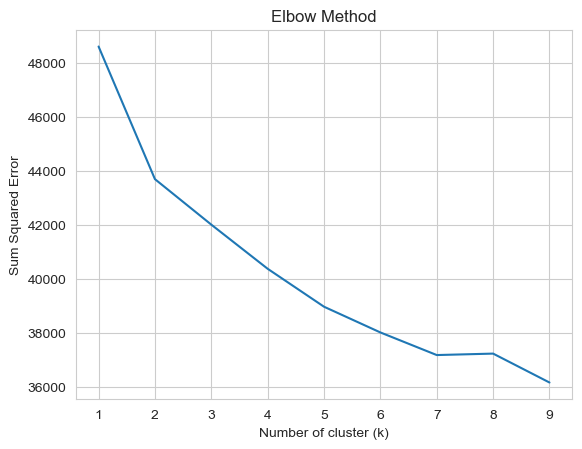

In [28]:
## finding out the number of clusters using the elbow method

sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,10), y=sse)

g.set(xlabel ="Number of cluster (k)",
      ylabel = "Sum Squared Error",
      title ='Elbow Method')

plt.show()

##### Interpretation: From the graph above, the number of clusters is 5.

In [48]:
## fitting the model

kmeans = KMeans(n_clusters=2, random_state=10)
kmeans.fit(data)

KMeans(n_clusters=2, random_state=10)

In [49]:
## finding the cluster centers

kmeans.cluster_centers_

array([[-0.34958519, -0.33798974,  0.09115782,  0.00543699, -0.00335716,
        -0.02118619,  0.01556327, -0.07179951,  0.02520255,  0.        ,
         0.02959848, -0.02858838,  0.03052087,  0.01283504,  0.00459677,
        -0.45641652,  0.05781125,  0.0015676 ,  0.04761439, -0.44741512,
        -0.02242563, -0.05335673,  0.01070074,  0.02705711,  0.00900316,
        -0.02984451,  0.        , -0.01090899, -0.46742431,  0.01529025,
        -0.01179975, -0.40001992, -0.36999279, -0.3269283 , -0.34747681],
       [ 0.82339655,  0.79608518, -0.21470886, -0.01280604,  0.00790731,
         0.04990096, -0.03665699,  0.16911321, -0.0593609 ,  0.        ,
        -0.06971486,  0.06733572, -0.07188742, -0.03023105, -0.01082701,
         1.07502205, -0.1361659 , -0.00369225, -0.1121487 ,  1.05382058,
         0.05282029,  0.12567393, -0.02520402, -0.06372904, -0.02120561,
         0.07029437,  0.        ,  0.02569452,  1.10094928, -0.03601393,
         0.02779258,  0.94218815,  0.87146366,  0.

In [50]:
## finding out the labels

kmeans.labels_

array([0, 0, 0, ..., 0, 1, 1])

In [51]:
## finding out the inertia

kmeans.inertia_

43693.239896483006

In [52]:
## finding out the score

kmeans.score

<bound method _BaseKMeans.score of KMeans(n_clusters=2, random_state=10)>

In [53]:
## predicting the kmeans

label = kmeans.fit_predict(data)
print(label)

[0 0 0 ... 0 1 1]


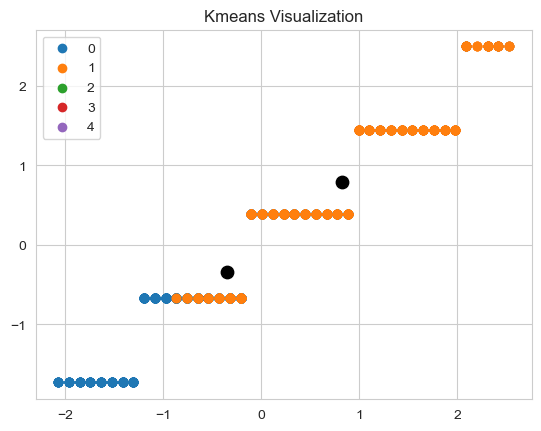

In [55]:
## Visualizing the results

# Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(pred)

# plotting the results:
 
for i in u_labels:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.title("Kmeans Visualization")
plt.show()

### Application.

##### This model can be used in various instances like customer segmentation, marketing etc